In [9]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Importing dataset
train = pd.read_csv('./data/train_1.csv').fillna(0)
page = train['Page']
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [11]:
import re

def get_source(page):
    res = re.search('_[a-z]+\.[a-z]+\.[a-z]+_[a-z\-]+_[a-z]+',page)
    if res:
        return res.group().split('_')[1]
    return 'na'

def get_access(page):
    res = re.search('_[a-z]+\.[a-z]+\.[a-z]+_[a-z\-]+_[a-z]+',page)
    if res:
        return res.group().split('_')[2]
    return 'na'

def get_agent(page):
    res = re.search('_[a-z]+\.[a-z]+\.[a-z]+_[a-z\-]+_[a-z]+',page)
    if res:
        return res.group().split('_')[3]
    return 'na'

source = train.Page.map(get_source)
access = train.Page.map(get_access)
agent = train.Page.map(get_agent)

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
source = le.fit_transform(source)
access = le.fit_transform(access)
agent = le.fit_transform(agent)

In [12]:
train = train.drop('Page',axis = 1)

In [13]:
source = np.reshape(source, (-1,1))
access = np.reshape(access, (-1,1))
agent = np.reshape(agent, (-1,1))

enc = preprocessing.OneHotEncoder()

source = enc.fit_transform(source)
access = enc.fit_transform(access)
agent = enc.fit_transform(agent)

In [14]:
print source.shape, train.shape

import sys



(145063, 9) (145063, 550)


In [15]:

article = 4991



rows = []


# for article in range(len(train)):
for article in range(500):
    row = train.iloc[article,:].values
    row_len = len(row)
    row = np.reshape(row,(1,row_len))
    sourceCol = np.rot90(np.repeat(source[article,:].toarray(), row_len, axis=0),1,(0,1))
    accessCol = np.rot90(np.repeat(access[article,:].toarray(), row_len, axis=0),1,(0,1))
    agentCol = np.rot90(np.repeat(agent[article,:].toarray(), row_len, axis=0),1,(0,1))
    row = np.append(row, sourceCol, axis=0)
    row = np.append(row, accessCol, axis=0)
    row = np.append(row, agentCol, axis=0)
    rows.append(row)

rows = np.array(rows)    
print rows.shape, sys.getsizeof(rows)/(1024*1024)

(500, 15, 550) 31


In [16]:
seq_length = 7

X = []
y = []
# for article in range(len(train)):
for article in range(500):
    for i in range(0, len(rows[article,0]) - seq_length, 1):
        ts_data = rows[article, :, i: i + seq_length]
        ts_data = np.rot90(ts_data, 3, (0,1))
        ts_output = rows[article, 0, i + seq_length]
        X.append(ts_data)
        y.append(ts_output)

    
X = np.array(X)
print X.shape, len(y), sys.getsizeof(X)/(1024*1024)



(271500, 7, 15) 271500 217


In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

# val_row =  (X_train.shape[2] - 1)


# # Feature Scaling
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0, 1))
# X_train_num = np.reshape(X_train[:,:,val_row],(-1,1))
y_train = np.reshape(y_train,(-1,1))


# X_train_num = sc.fit_transform(X_train_num)

# y_train = sc.transform(y_train)

# X_train_num = np.reshape(X_train_num, (X_train.shape[0], X_train.shape[1]))

# X_train[:, :, val_row] = X_train_num

# X_train = np.rot90(X_train, 1, (2, 1))

print X_train.shape

(217200, 7, 15)


In [38]:
print X_train[7, :, 14], y_train[:7]

[ 22.  26.  24.  19.  10.  14.  15.] [[ 22.]
 [ 26.]
 [ 24.]
 [ 19.]
 [ 10.]
 [ 14.]
 [ 15.]]


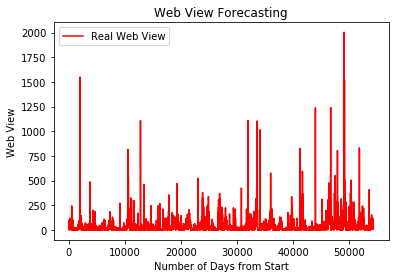

In [39]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
# plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [40]:
# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 32, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 8, epochs = 3, verbose = 1)

Epoch 1/3
217200/217200 [==============================] - 82s - loss: 93630.5048    
Epoch 2/3
217200/217200 [==============================] - 81s - loss: 74626.8682    
Epoch 3/3
217200/217200 [==============================] - 81s - loss: 75579.4584    


In [41]:
inputs = X_test
# inputs_num = np.reshape(inputs[:,0,:],(-1,1))

# inputs_num = sc.transform(inputs_num)

# inputs_num = np.reshape(inputs_num, (X_test.shape[0], X_test.shape[2]))

# inputs[:,0,:] = inputs_num
# inputs = np.rot90(inputs,1, (2,1))

# Getting the predicted Web View
y_pred = regressor.predict(inputs)
# y_pred = sc.inverse_transform(y_pred)
print y_train.shape, len(y_test)


(217200, 1) 54300


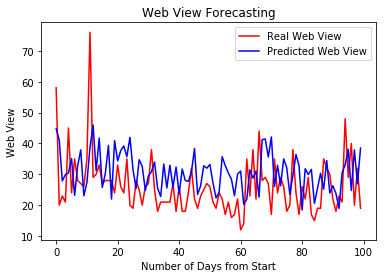

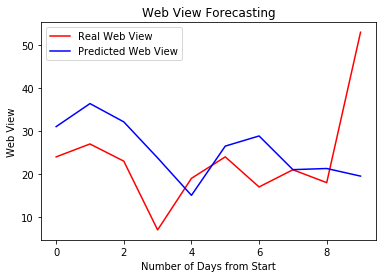

In [42]:


#Visualising Result
plt.figure
plt.plot(y_test[2000:2100], color = 'red', label = 'Real Web View')
plt.plot(y_pred[2000:2100], color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()


plt.figure
plt.plot(y_test[2100:2110], color = 'red', label = 'Real Web View')
plt.plot(y_pred[2100:2110], color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [14]:
regressor.save('model_500a_7ts_32u_lstm_adam_32b_10e.h5')

In [16]:
print X[4491,0,:], y[4490]
print X_train[4491,:,14], y_train[4491-7:4491]

[  6.   3.  15.  10.   7.   1.   4.] 4.0
[ 0.08571429  0.04285714  0.21428571  0.14285714  0.1         0.01428571
  0.05714286] [[ 0.08571429]
 [ 0.04285714]
 [ 0.21428571]
 [ 0.14285714]
 [ 0.1       ]
 [ 0.01428571]
 [ 0.05714286]]


#### Rows giving good results
11233 - 
13086 - The walking dead